In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas_profiling as pp

In [3]:
netflix = pd.read_csv("titles.csv")
netflix.head(5)


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [4]:
credit = pd.read_csv("credits.csv")
credit.head(2)

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR


In [5]:
# joining the two dataframes
joined_df = netflix.merge(credit, how = 'inner', left_on = "id", right_on = "id")
joined_df.head(3)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,3748,Robert De Niro,Travis Bickle,ACTOR
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,14658,Jodie Foster,Iris Steensma,ACTOR
2,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,7064,Albert Brooks,Tom,ACTOR


In [6]:
netflix.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5806.000000,5806.000000,2047.000000,5283.000000,5.267000e+03,5712.000000,5488.000000
mean,2016.013434,77.643989,2.165608,6.533447,2.340719e+04,22.525660,6.818039
std,7.324883,39.474160,2.636207,1.160932,8.713432e+04,68.849177,1.171560
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2015.000000,44.000000,1.000000,5.800000,5.210000e+02,3.155250,6.100000
50%,2018.000000,84.000000,1.000000,6.600000,2.279000e+03,7.478000,6.900000
75%,2020.000000,105.000000,2.000000,7.400000,1.014400e+04,17.775750,7.500000
max,2022.000000,251.000000,42.000000,9.600000,2.268288e+06,1823.374000,10.000000


In [7]:
netflix.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [8]:
netflix.dtypes

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

In [9]:
# description about the null values in the dataframe
null_val = pd.DataFrame(netflix.isnull().sum().reset_index().values, columns={"column","null_count"})
null_per = pd.DataFrame((netflix.isnull().sum()*100/netflix.shape[0]).round(2).reset_index().values, columns={"column","%_null"})
final = null_val.merge(null_per, how = 'inner', left_on = 'column', right_on = 'column')
final

,null_count,column,%_null
0,id,0,id
1,id,0,type
2,id,0,release_year
3,id,0,runtime
4,id,0,genres
5,id,0,production_countries
6,type,0,id
7,type,0,type
8,type,0,release_year
9,type,0,runtime


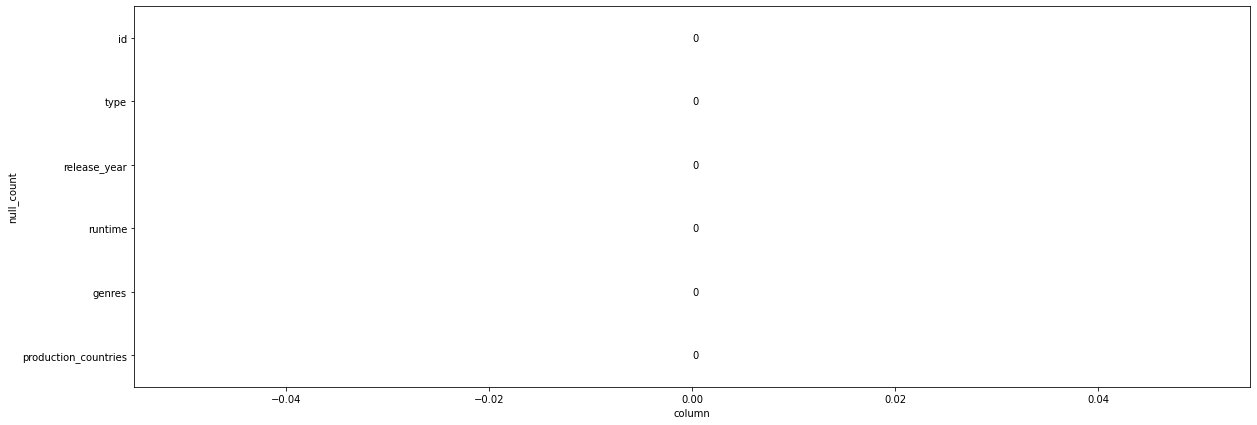

In [10]:
# null values from each columns
plt.figure(figsize = (20,7))
chart = sns.barplot(x = final['column'], y = final['null_count'])
chart.bar_label(chart.containers[0])

plt.show()

NameError: name 'xd' is not defined

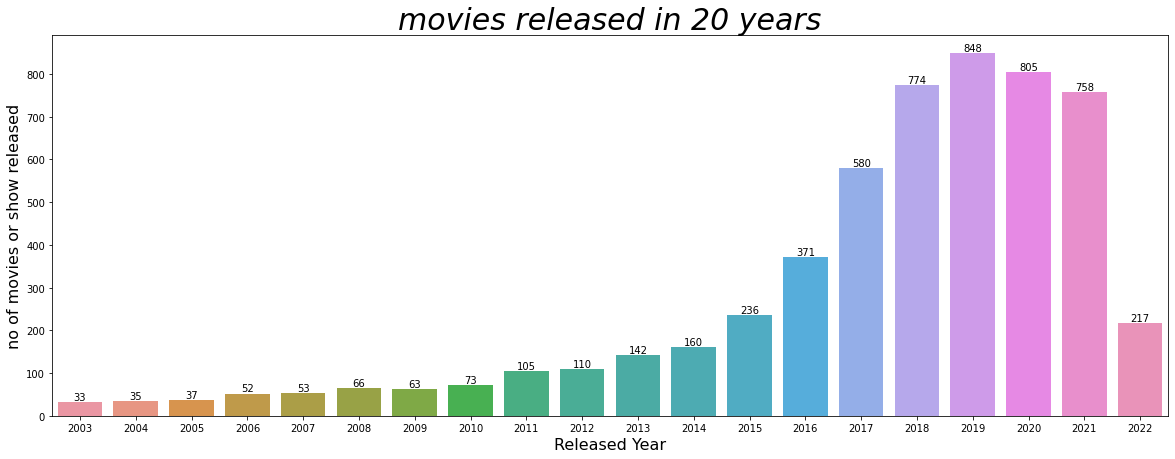

In [11]:
# Total number of movies and shows released in years

release_yr = netflix.release_year.value_counts().reset_index().rename(columns=
                                                         {'index':'release_year',
                                                          'release_year':'no_of_movies/show released'})[:20]
plt.figure(figsize = (20,7))
bar_chart = sns.barplot(x = release_yr.release_year, y = release_yr["no_of_movies/show released"])
plt.title("movies released in 20 years", fontsize=30, fontstyle = 'italic')
plt.ylabel("no of movies or show released", fontsize = 16)
plt.xlabel("Released Year", fontsize = 16)
bar_chart.bar_label(bar_chart.containers[0])
plt.show(xd)

In [ ]:
plt.figure(figsize = (15,5))
chart = sns.countplot(x = "type", data = netflix, hue ='age_certification')
plt.show(chart)

In [ ]:
# old 10 movies
netflix.head(3)
old_movies = netflix.sort_values(by='release_year', ascending = True)
old_movies[['title','release_year']][:10]



In [ ]:
x = netflix.age_certification.value_counts().reset_index().rename(columns=
                                                                {'index':'age_certification','age_certification':'age_cert_count'})
x

In [ ]:
plt.figure(figsize = (10,10))
plt.pie(x["age_cert_count"], labels = x["age_certification"], autopct='%.1f%%',
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}, 
        textprops = {'size':'x-large'})
plt.title("age certification status",fontsize = 20,fontstyle = 'italic')
plt.show()

In [12]:
netflix.head(3)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8


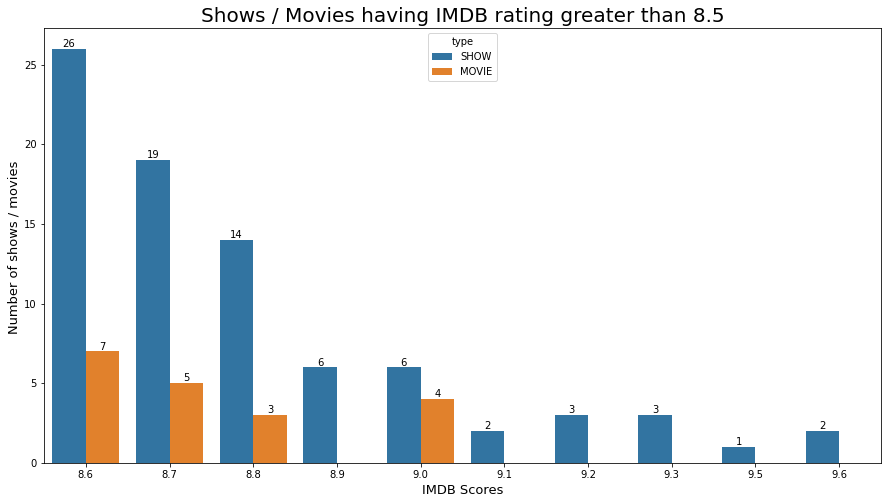

In [13]:
# number of shows & Movies having IMDB score greater than 8.5

x = netflix[(netflix.imdb_score > 8.5)  ]
x
plt.figure(figsize = (15,8))
chart = sns.countplot( x = "imdb_score" , data = x, hue = "type")
plt.ylabel("Number of shows / movies ", fontsize = 13)
plt.xlabel("IMDB Scores", fontsize = 13)
plt.title("Shows / Movies having IMDB rating greater than 8.5", fontsize = 20)
chart.bar_label(chart.containers[0])
chart.bar_label(chart.containers[1])
plt.show(chart)

In [14]:
# number of shows and movies released in a year.

shows= netflix.release_year[netflix.type == "SHOW"].value_counts().reset_index().rename(columns={'index':'released_year','release_year':'number of shows'})
df1 = pd.DataFrame(xx)
movies = netflix.release_year[netflix.type == "MOVIE"].value_counts().reset_index().rename(columns={'index':'released_year','release_year':'number of Movies'})
df2 = pd.DataFrame(movies)

merged = df1.merge(df2, how = "inner", left_on = "released_year", right_on = "released_year")
merged["total shows & movies"] = merged["number of shows"] + merged["number of Movies"]
merged.head(10)


NameError: name 'xx' is not defined

In [ ]:
# creting trendlines
plt.figure(figsize = (20,6))
sns.lineplot(x = "released_year",y = "number of shows", data = merged, marker='o')
sns.lineplot(x = "released_year",y = "number of Movies", data = merged,marker='D')
plt.xlabel("Released Year", fontsize = 15,color = "black")
plt.ylabel("Number of Movies/ Shows", fontsize = 15,color = "black")
plt.title("Show & Movies Trendline", fontsize = 20,color = "black")
plt.legend(labels=["number of shows","number of Movies"])
plt.show()

In [15]:
# countries produces movies having IMBD score greater than or equals to 9 
netflix[netflix.imdb_score >= 9].production_countries.value_counts().reset_index().rename(
    columns={'index':'production_country','production_countries':'number of movies/shows'})

,production_country,number of movies/shows
0,['US'],5
1,['IN'],4
2,['JP'],3
3,[],2
4,['KR'],2
5,['GB'],2
6,['EG'],1
7,['AR'],1
8,['CN'],1


In [16]:
data_imdb = netflix[netflix.imdb_score >= 9]
x = data_imdb[["title","release_year","imdb_score","imdb_votes"]]
data_req = pd.DataFrame(x)
data_req

,title,release_year,imdb_score,imdb_votes
25,No Longer Kids,1979,9.0,943.0
205,Okupas,2000,9.0,2326.0
243,Breaking Bad,2008,9.5,1727694.0
259,Avatar: The Last Airbender,2005,9.3,297336.0
270,DEATH NOTE,2006,9.0,302147.0
656,Khawatir,2005,9.6,3046.0
717,Hunter x Hunter,2011,9.0,87857.0
876,Chhota Bheem & Krishna in Mayanagari,2011,9.0,5.0
917,Attack on Titan,2013,9.0,325381.0
1099,"Raja, Rasoi Aur Anya Kahaniyaan",2014,9.0,327.0


In [17]:
netflix.genres.value_counts().reset_index().head(10)

,index,genres
0,['comedy'],510
1,['drama'],350
2,['documentation'],320
3,"['comedy', 'drama']",141
4,"['drama', 'comedy']",128
5,['reality'],120
6,"['drama', 'romance']",112
7,"['comedy', 'documentation']",93
8,['animation'],69
9,[],68
